# Control program enablement

This example shows how to use PyAEDT to enable a control program in a Maxwell 2D project.
It shows how to create the geometry, load material properties from an Excel file, and
set up the mesh settings. Moreover, it focuses on postprocessing operations, in particular how to
plot field line traces, which are relevant for an electrostatic analysis.

Keywords: **Maxwell 2D**, **control program**.

## Perform imports and define constants

Perform required imports.

In [1]:
import tempfile
import time

In [2]:
from ansys.aedt.core import Maxwell2d, downloads

Define constants.

In [3]:
AEDT_VERSION = "2024.2"
NUM_CORES = 4
NG_MODE = False  # Open AEDT UI when it is launched.

## Create temporary directory

Create a temporary directory where downloaded data or
dumped data can be stored.
If you'd like to retrieve the project data for subsequent use,
the temporary folder name is given by ``temp_folder.name``.

In [4]:
temp_folder = tempfile.TemporaryDirectory(suffix=".ansys")

## Download project file

Download the files required to run this example to the temporary working folder.

In [5]:
aedt_file = downloads.download_file(
    source="maxwell_ctrl_prg",
    name="ControlProgramDemo.aedt",
    destination=temp_folder.name,
)
ctrl_prg_file = downloads.download_file(
    source="maxwell_ctrl_prg", name="timestep_only.py", destination=temp_folder.name
)

## Launch Maxwell 2D

Create an instance of the ``Maxwell2d`` class named ``m2d``.

In [6]:
m2d = Maxwell2d(
    project=aedt_file,
    version=AEDT_VERSION,
    new_desktop=True,
    non_graphical=NG_MODE,
)

PyAEDT INFO: Parsing C:\Users\ansys\AppData\Local\Temp\tmp32c8_01w.ansys\maxwell_ctrl_prg\ControlProgramDemo.aedt.


PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyAEDT INFO: PyAEDT version 0.12.dev0.


PyAEDT INFO: Initializing new Desktop session.


PyAEDT INFO: Log on console is enabled.


PyAEDT INFO: Log on file C:\Users\ansys\AppData\Local\Temp\pyaedt_ansys_66234b08-1a4f-48ec-aac0-d0184466f45f.log is enabled.


PyAEDT INFO: Log on AEDT is enabled.


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


PyAEDT INFO: Launching PyAEDT with gRPC plugin.


PyAEDT INFO: New AEDT session is starting on gRPC port 65069


PyAEDT INFO: File C:\Users\ansys\AppData\Local\Temp\tmp32c8_01w.ansys\maxwell_ctrl_prg\ControlProgramDemo.aedt correctly loaded. Elapsed time: 0m 0sec


PyAEDT INFO: AEDT installation Path C:\Program Files\AnsysEM\v242\Win64


PyAEDT INFO: Ansoft.ElectronicsDesktop.2024.2 version started with process ID 2692.


PyAEDT INFO: Project ControlProgramDemo has been opened.


PyAEDT INFO: No consistent unique design is present. Inserting a new design.


PyAEDT INFO: Added design 'Maxwell 2D_5XO' of type Maxwell 2D.


PyAEDT INFO: Aedt Objects correctly read


## Set active design

In [7]:
m2d.set_active_design("1 time step control")

PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyAEDT INFO: PyAEDT version 0.12.dev0.


PyAEDT INFO: Returning found Desktop session with PID 2692!


PyAEDT INFO: Project ControlProgramDemo set to active.


PyAEDT INFO: Aedt Objects correctly read


True

## Get setup

Get the simulation setup for this design so that the control program can be enabled.

In [8]:
setup = m2d.setups[0]

## Enable control program

Enable the control program by giving the path to the file.

In [9]:
setup.enable_control_program(control_program_path=ctrl_prg_file)

True

## Analyze setup

Run the analysis.

In [10]:
m2d.save_project()
m2d.analyze(setup=setup.name, cores=NUM_CORES, use_auto_settings=False)

PyAEDT INFO: Project ControlProgramDemo Saved correctly


PyAEDT INFO: Key Desktop/ActiveDSOConfigurations/Maxwell 2D correctly changed.


PyAEDT INFO: Solving design setup Setup1


PyAEDT INFO: Key Desktop/ActiveDSOConfigurations/Maxwell 2D correctly changed.


PyAEDT INFO: Design setup Setup1 solved correctly in 0.0h 0.0m 25.0s


True

## Plot results

Display the simulation results.

PyAEDT INFO: Parsing C:/Users/ansys/AppData/Local/Temp/tmp32c8_01w.ansys/maxwell_ctrl_prg/ControlProgramDemo.aedt.


PyAEDT INFO: File C:/Users/ansys/AppData/Local/Temp/tmp32c8_01w.ansys/maxwell_ctrl_prg/ControlProgramDemo.aedt correctly loaded. Elapsed time: 0m 0sec


PyAEDT INFO: aedt file load time 0.11052298545837402


PyAEDT INFO: Modeler2D class has been initialized!


PyAEDT INFO: Modeler class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Post class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Solution Data Correctly Loaded.


C:\actions-runner\_work\pyaedt-examples\pyaedt-examples\.venv\lib\site-packages\ansys\aedt\core\visualization\plot\matplotlib.py:407: RuntimeWarning: invalid value encountered in divide
  theta = np.arccos(z / r) * 180 / math.pi  # to degrees


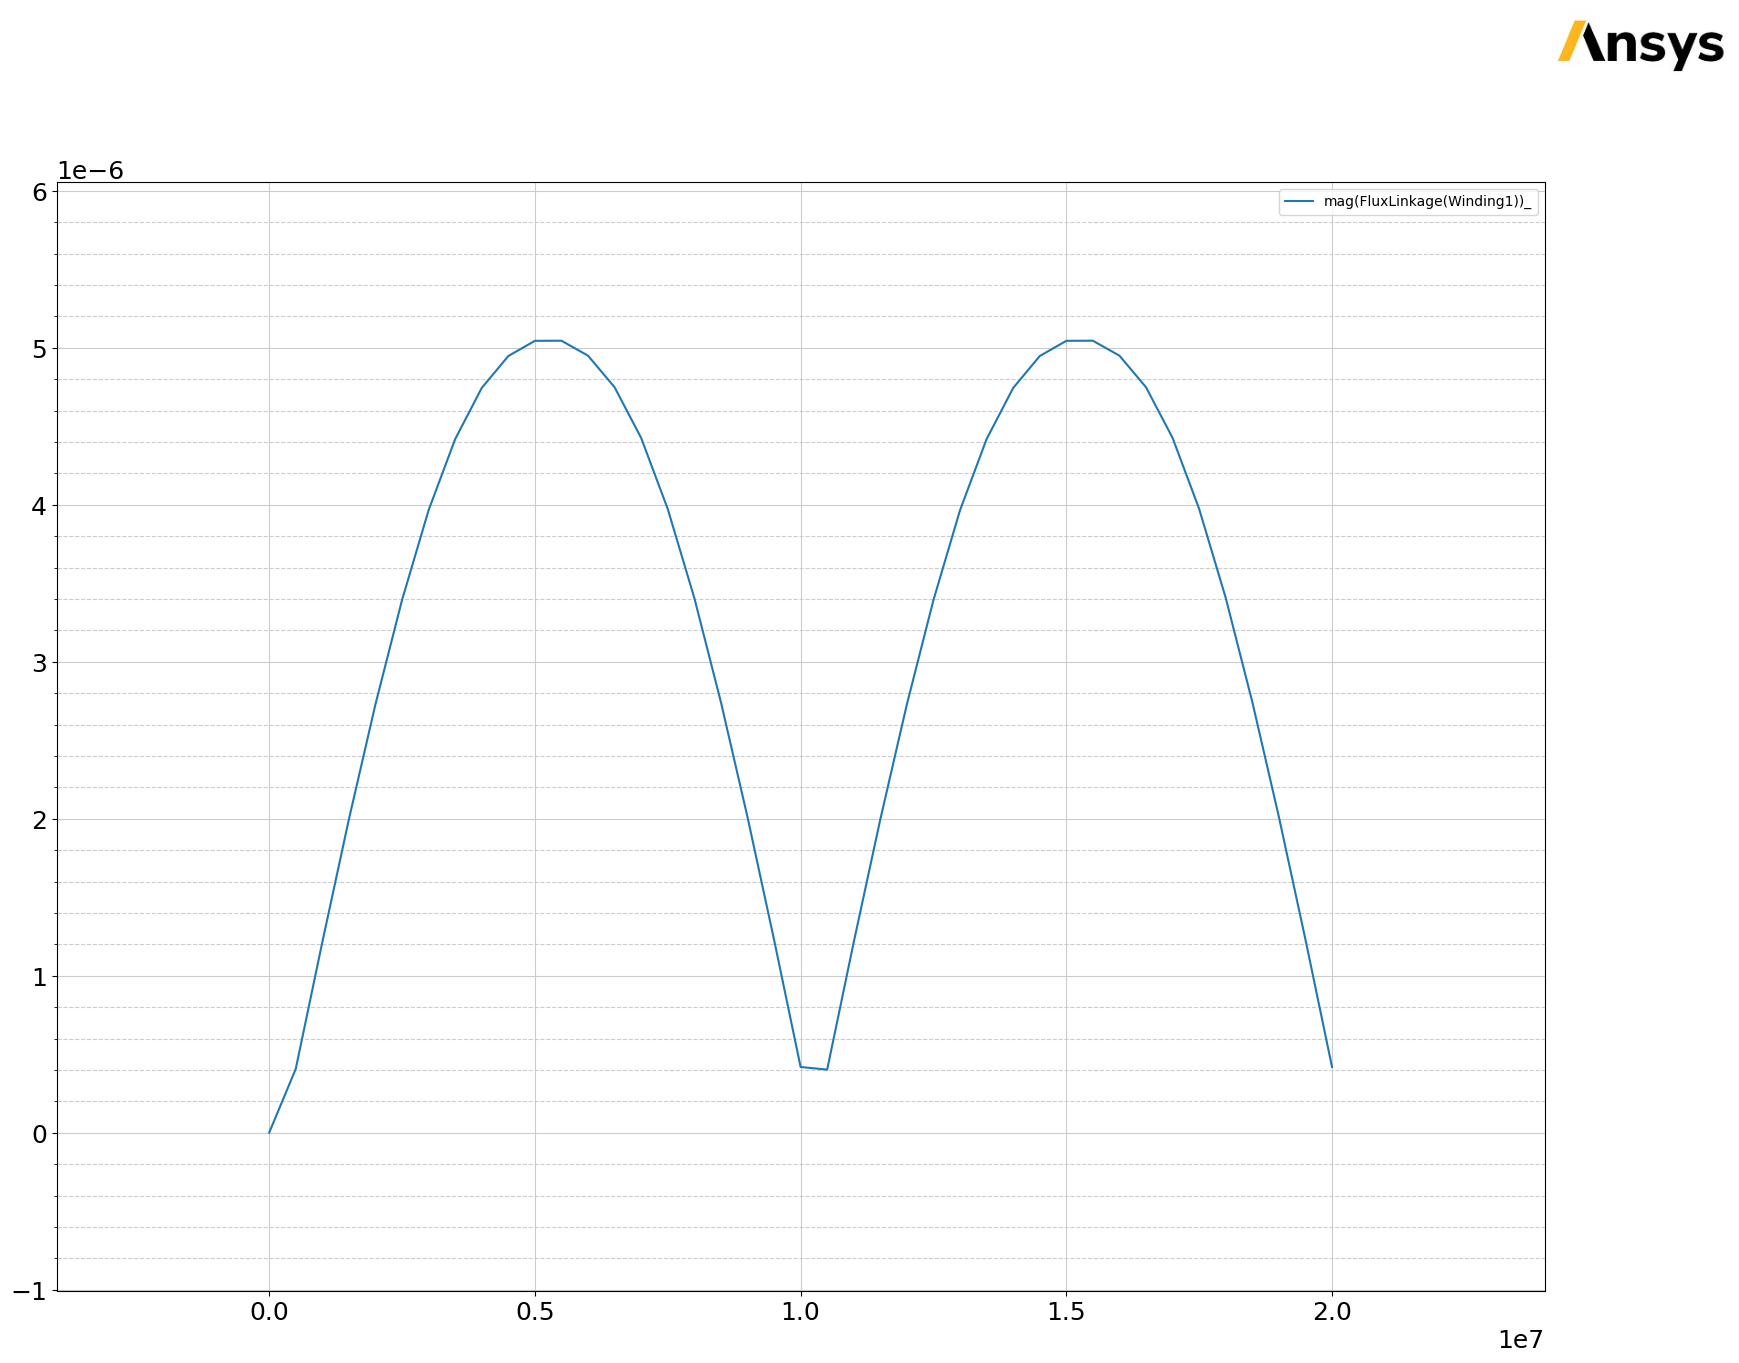

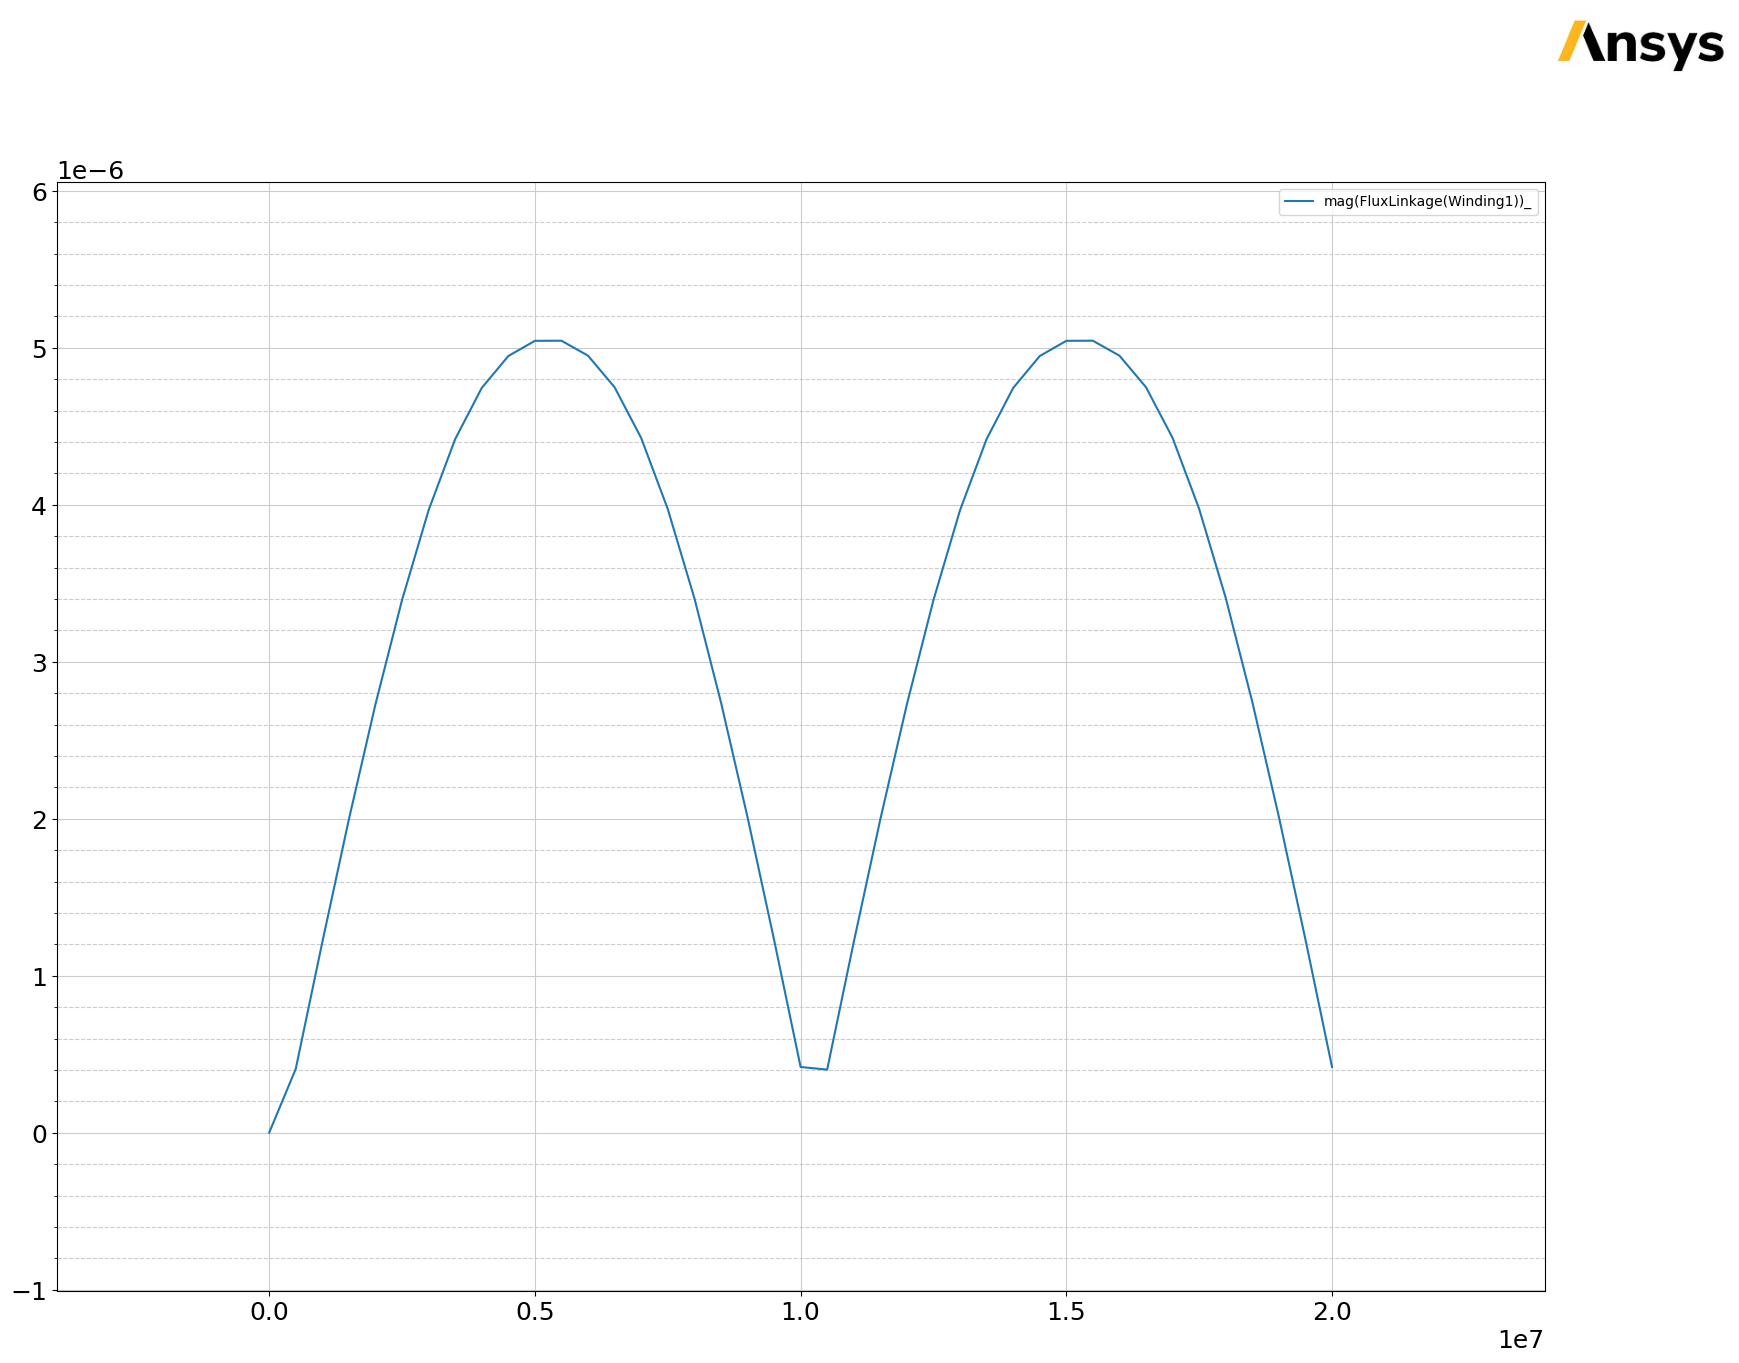

In [11]:
sols = m2d.post.get_solution_data(
    expressions="FluxLinkage(Winding1)",
    variations={"Time": ["All"]},
    primary_sweep_variable="Time",
)
sols.plot()

## Release AEDT

In [12]:
m2d.save_project()
m2d.release_desktop()
# Wait 3 seconds to allow AEDT to shut down before cleaning the temporary directory.
time.sleep(3)

PyAEDT INFO: Project ControlProgramDemo Saved correctly


PyAEDT INFO: Desktop has been released and closed.


## Clean up

All project files are saved in the folder ``temp_folder.name``.
If you've run this example as a Jupyter notebook, you
can retrieve those project files. The following cell
removes all temporary files, including the project folder.

In [13]:
temp_folder.cleanup()